In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold values
regression_df = pd.DataFrame({'today':[0.0] * numrows,
                             'tomorrow':[True] * numrows}) #initalize as boolean

#sort columns for convience
seq = ['today',
       'tomorrow']

regression_df = regression_df.reindex(columns=seq)

In [3]:
#populate the regression data frame with values from the pandas dataframe
for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    regression_df.iat[i,1] = tomorrow
    regression_df.iat[i,0] = today

regression_df = regression_df.dropna() #exclude any rows with missing data

In [4]:
regression_df.head(20)

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True
5,0.17,True
6,0.44,True
7,0.41,True
8,0.04,True
9,0.12,True


In [5]:
from sklearn import linear_model
#modify the data to work with this model
x = regression_df.today.values
y = regression_df.tomorrow.values
x = x.reshape(regression_df.shape[0], 1)
#note that we did not need to reshape the y values as we did with linear regression

In [6]:
clf = linear_model.LogisticRegression(solver='lbfgs').fit(x, y)

In [7]:
#we can calculate the accuarcy using the score method
score = clf.score(x,y)
print(score)

0.6707116574023331


In [8]:
from sklearn import metrics
#we can also make a simple confusion matrix
predictions = clf.predict(x)
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[13431  1213]
 [ 7199  3703]]


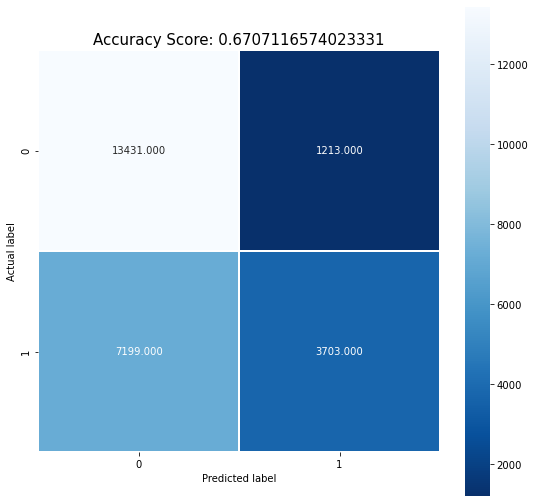

In [9]:
#Here is a bit nicer matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold values
regression_df = pd.DataFrame({'intercept':[1] * numrows,
                             'today':[0.0] * numrows,
                             'yesterday':[0.0] * numrows,
                             'tomorrow':[True] * numrows})

#sort columns for convience
seq = ['intercept',
       'today',
       'yesterday',
       'tomorrow']
regression_df = regression_df.reindex(columns=seq)

In [61]:
for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    yesterday = df.iloc[(i-2),1]
    regression_df.iat[i,3] = tomorrow
    regression_df.iat[i,2] = today
    regression_df.iat[i,1] = yesterday


regression_df = regression_df.dropna() #exclude any rows with missing data

In [62]:
regression_df.head(20)

,intercept,today,yesterday,tomorrow
0,1,0.00,0.00,True
1,1,0.00,0.47,True
2,1,0.47,0.59,True
3,1,0.59,0.42,True
4,1,0.42,0.31,True
5,1,0.31,0.17,True
6,1,0.17,0.44,True
7,1,0.44,0.41,True
8,1,0.41,0.04,True
9,1,0.04,0.12,True


In [63]:
from sklearn import linear_model
#modify the data to work with this model
x = regression_df.today.values
y = regression_df.tomorrow.values
z = regression_df.yesterday.values
x = x.reshape(regression_df.shape[0], 1)
#note that we did not need to reshape the y values as we did with linear regression

In [64]:
from sklearn import utils
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)


In [65]:
clf = linear_model.LogisticRegression(solver='lbfgs').fit(x, training_scores_encoded,z)

In [67]:
#we can calculate the accuarcy using the score method
score = clf.score(x,training_scores_encoded,z)
print(score)

0.7628926761860895
